# Uploading 2 datasets from Kaggle (one on sarcasm comments from Reddit and the other on cyberbullying tweets, from Twitter) and merging them

In this notebook, we are doing EDA and data preparation to later have one dataset with comments from social networks being labeled either "sarcasm" or "cyberbullying", and to train a model (or several models and then compare them!) to distinguish between those labels and let a model eventually classify a new comment into sarcasm or bullying (classification task).

In [1]:
import pandas as pd
import re

## Let's start with the Reddit dataset - sarcasm

In [2]:
sarcasm_df_0 = pd.read_csv('train-balanced-sarcasm.csv')
sarcasm_df_0.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [3]:
sarcasm_df = sarcasm_df_0[['label', 'comment']]
sarcasm_df = sarcasm_df[sarcasm_df['label'] == 1]
sarcasm_df['label'] = 'sarcasm'
sarcasm_df = sarcasm_df.dropna()
sarcasm_df

,label,comment
33,sarcasm,But they'll have all those reviews!
44,sarcasm,wow it is totally unreasonable to assume that ...
45,sarcasm,Ho ho ho... But Melania said that there is no ...
66,sarcasm,I can't wait until @potus starts a twitter war...
69,sarcasm,gotta love the teachers who give exams on the ...
...,...,...
1010821,sarcasm,I'm sure that Iran and N. Korea have the techn...
1010822,sarcasm,"whatever you do, don't vote green!"
1010823,sarcasm,Perhaps this is an atheist conspiracy to make ...
1010824,sarcasm,The Slavs got their own country - it is called...


In [4]:
sarcasm_df.describe()

,label,comment
count,505368,505368
unique,1,486357
top,sarcasm,You forgot the
freq,505368,1451


In [5]:
sarcasm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505368 entries, 33 to 1010825
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    505368 non-null  object
 1   comment  505368 non-null  object
dtypes: object(2)
memory usage: 11.6+ MB


In [6]:
sarcasm_df['comment'].str.len().mean()   

56.44981083091925

In [7]:
#delete from sarcasm dataset every comment > 280 characters (to be comparable to Twitter dataset)
sarcasm_df = sarcasm_df[sarcasm_df['comment'].str.len() <= 280]

In [8]:
sarcasm_df.describe()
print("So far, we have filtered out",(sarcasm_df_0.shape[0] - sarcasm_df.shape[0]), "comments from the sarcasm dataset.")

So far, we have filtered out 506202 comments from the sarcasm dataset.


## Now on to the cyberbullying dataset...
Some EDA before merging the two datasets together

In [9]:
cyberbullying_df_0 = pd.read_csv('cyberbullying_tweets.csv')

In [10]:
cyberbullying_df_0.sample(10)

,tweet_text,cyberbullying_type
12980,MALE OPINION ALERT! @MusicYouSavedMe I swear i...,gender
40359,Hello Twitter. So my friend Marisol who is a p...,ethnicity
19417,"But that’s not what you were doing, ‘Eagle’ fr...",religion
32619,i am the middle school bully nobody fucks with me,age
46179,"I will never forget in year 5, two white girls...",ethnicity
40871,Talk about your People you sorry ass dumb-ass ...,ethnicity
13438,"RT @victorymonk: Oh, I have one too!!! @MT8_9...",gender
46484,"but if they did get deleted, then your problem...",ethnicity
6778,http://t.co/NWY9bX6,not_cyberbullying
19413,Turning point is not good now they fight a Chr...,religion


In [11]:
cyberbullying_df_0.shape

(47692, 2)

In [12]:
cyberbullying_df_0['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [13]:
#reading quickly through the "other_cyberbullying" column, to decide if we should keep it or not (is it really
# bullying that cannot be under other labels or is it a label that was used to say "not bullying")
other_cyberbullying_df = cyberbullying_df_0[cyberbullying_df_0['cyberbullying_type'] == 'other_cyberbullying']

In [14]:
pd.options.display.max_colwidth = 280
other_cyberbullying_df.tweet_text.tail(25)
#so yes, I decide to get rid of this column...most comments not being necessarily bullying in my opinion

31714             @a_man_in_black i can't help but wonder if she bothered actually *talking* to kiva about her concerns before calling her out
31715                                                                                 @mattstratton dude stop snapping at me what is your deal
31716                                                   RT @randi_ebooks: Need to get Google to stop trying to recruit me for an SRE position?
31717                                                                         @SlaunchaMan interesting, tho, that it still found most of them.
31718                           @frankencomics @BRKeogh @Aqualec With added "feminazi", "white knight" and "professional victims" terminology.
31719                                         Wal-Mart is Instagram Heaven! #walmart #coon #westvirginia #almostheaven https://t.co/Zav64hhGDG
31720                                                           @letselenasmile i dnt get it when ppl bully u dnt stand u have to do something

Keeping only the relevant columns and labels

In [15]:
cyberbullying_df = cyberbullying_df_0[cyberbullying_df_0['cyberbullying_type'].isin(['gender', 'religion', 'age', 'ethnicity'])]

In [16]:
cyberbullying_df['cyberbullying_type'].unique()

array(['gender', 'religion', 'age', 'ethnicity'], dtype=object)

In [17]:
print("So far, we have filtered out",(cyberbullying_df_0.shape[0] - cyberbullying_df.shape[0]), "comments from the cyberbullying dataset.")
cyberbullying_df

So far, we have filtered out 15768 comments from the cyberbullying dataset.


,tweet_text,cyberbullying_type
7945,rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from,gender
7946,You never saw any celebrity say anything like this for Obama: B Maher Incest Rape 'Joke' S Colbert Gay 'joke' K Griffin beheading 'joke',gender
7947,"@ManhattaKnight I mean he's gay, but he uses gendered slurs and makes rape jokes",gender
7948,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @_mecaesmal feminazi,gender
7949,Rape is rape. And the fact that I read one post about a guy getting raped and the comments are calling him gay and he should be happy...? stfu and I really hope no one takes this as a joke tf you own no ones body. You have no rights to do whatever you want to someone else.,gender
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


In [18]:
cyberbullying_df['label'] = cyberbullying_df['cyberbullying_type']
cyberbullying_df['comment'] = cyberbullying_df['tweet_text']
cyberbullying_df = cyberbullying_df[['label','comment']]
cyberbullying_df

/tmp/ipykernel_4909/1974539096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyberbullying_df['label'] = cyberbullying_df['cyberbullying_type']
/tmp/ipykernel_4909/1974539096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyberbullying_df['comment'] = cyberbullying_df['tweet_text']


,label,comment
7945,gender,rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from
7946,gender,You never saw any celebrity say anything like this for Obama: B Maher Incest Rape 'Joke' S Colbert Gay 'joke' K Griffin beheading 'joke'
7947,gender,"@ManhattaKnight I mean he's gay, but he uses gendered slurs and makes rape jokes"
7948,gender,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @_mecaesmal feminazi
7949,gender,Rape is rape. And the fact that I read one post about a guy getting raped and the comments are calling him gay and he should be happy...? stfu and I really hope no one takes this as a joke tf you own no ones body. You have no rights to do whatever you want to someone else.
...,...,...
47687,ethnicity,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future."
47688,ethnicity,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”
47689,ethnicity,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.
47690,ethnicity,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS."


### About a very long comment in Twitter dataset - cyberbullying

In [19]:
cyberbullying_df['comment'].str.len().max()

1869

In [20]:
pd.options.display.max_colwidth = cyberbullying_df['comment'].str.len().max()
cyberbullying_df[cyberbullying_df['comment'].str.len() == cyberbullying_df['comment'].str.len().max()]

,label,comment
44035,ethnicity,"You so black and white trying to live like a nigger... Pahahahaha... Common is dumb as fuck!\r\nit's short for huntsman you dumb ass and he'll ya i am fuck gays and niggers #TrumpTrain#fuckgays\r\nU were the first one to inspire me to dream...dream no matter how foolish those dreams seem to others. Thank u so much for that. Ur work has inspired all of us &amp; will continue to inspire generations to come. RIP Dr. Kalam\r\nI wasn't comparing anything, Saying that a book is being used to opress lgbt people now and black people in the past isn't a comparison It's a statement that they both got oppressed due to the same book , not trying to compare struggles but saying the Bible is the common denom.\r\n@in_JEpan: Fuck @FemaleJawan for almost tripping me in the Hallway, DUMB HO NIGGER BISH. &lt; you sound a little mad. Lmaoooo.\r\nLOL ! this bitch looks dumb as FUCK now that she already agreed to marry this nigger but then find's out he fucked 20 other bitches.\r\nYoung black voters aren’t afraid to call by not on his big the past and current stance against anything that helps communities of color Young Black Voters Don’t Want Joe Biden! https://youtu.be/N3IUV-4Y8mc\r\n@PacManCannon @MichelleDBeadle pacman shut the fuck up .if she called u a dumb nigger u would be all up in arms.so chill the fuck out\r\n@babyStephiee yes the fuck you did! all them niggers were like stephanie said to jump yo ass!da fuck! you sound dumb as fuck!\r\nRT @Curvables: Ugly niggas be like http://t.co/XcsLPOdqsh\r\n@iNeedSomePercs @RayJones215 STUPID FUCKING NIGGERS. MACLIN LOST THAT GAME. KAFKA WAS 7 OF 8 U DUMB NIGGER: Maaan Fuck Off my TL u Troll!!!!\r\ni hope the world aint judging niggers based on hip hop.. cause we looking dumb as fuck right about now.\r\n“@_Nekole_ To see a nigga on twitter retweet a white chick saying fuck Obama, dumb ass nigger"" makes me ..."


In [21]:
#Split the strings on the "\r\n" characters
split_df = cyberbullying_df['comment'].str.split('\r\n')
# delete rows containing '\r\n' 
cyberbullying_df = cyberbullying_df[~cyberbullying_df.comment.str.contains('\r\n')]
split_df = pd.DataFrame(split_df)
split_df['comment'] = split_df['comment'].str.join(',')  #convert each line to string
split_df['cyberbullying_type'] = 'ethnicity' #reestablish the label
split_df

,comment,cyberbullying_type
7945,rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from,ethnicity
7946,You never saw any celebrity say anything like this for Obama: B Maher Incest Rape 'Joke' S Colbert Gay 'joke' K Griffin beheading 'joke',ethnicity
7947,"@ManhattaKnight I mean he's gay, but he uses gendered slurs and makes rape jokes",ethnicity
7948,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @_mecaesmal feminazi,ethnicity
7949,Rape is rape. And the fact that I read one post about a guy getting raped and the comments are calling him gay and he should be happy...? stfu and I really hope no one takes this as a joke tf you own no ones body. You have no rights to do whatever you want to someone else.,ethnicity
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


In [22]:
split_df.info

<bound method DataFrame.info of                                                                                                                                                                                                                                                                                     comment  \
7945                                                                                                                        rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from   
7946                                                                                                                                               You never saw any celebrity say anything like this for Obama: B Maher Incest Rape 'Joke' S Colbert Gay 'joke' K Griffin beheading 'joke'   
7947                                                                                                       

--> Ok, we understood that the very long comment was not additional comments but just a cell that repeated comments that were entered in the CSV on individual rows already. So we just need to get rid of this one cell and keep the rest.


In [23]:
#cyberbullying_df.drop(index=44035, inplace=True)
cyberbullying_df = cyberbullying_df[cyberbullying_df['comment'].str.len() < cyberbullying_df['comment'].str.len().max()]


In [24]:
cyberbullying_df['comment'].str.len().max()
#the new max len is 500+ but we will deal with links soon.
pd.options.display.max_colwidth = cyberbullying_df['comment'].str.len().max()
cyberbullying_df[cyberbullying_df['comment'].str.len() == cyberbullying_df['comment'].str.len().max()]

,label,comment
10140,gender,"Why boys crack up at rape jokes, think having a girlfriend is “gay,” and still can’t cry—and why we need to give them new and better models of masculinity Jeff Perera Thank you for sharing. #leadershipdevelopement #leadershipexcellence #better https://www.theatlantic.com/magazine/archive/2020/01/the-miseducation-of-the-american-boy/603046/?preview=6iueaQcbGmSVmP5F6DO-ubMaCOQ&amp;utm_campaign=later-linkinbio-theatlantic&amp;utm_content=later-4467028&amp;utm_medium=social&amp;utm_source=instagram&amp;fbclid=IwAR1cg03PzmHqBerwagxqctorPCsVSItIAmZehR5sHOrYsq51PiR92lj..."


## Let's merge the two datasets and make the new dataset more uniform

In [25]:
#concatenate sarcasm_df and cyberbullying_df datasets into 1
merged_all_df = pd.concat([sarcasm_df,cyberbullying_df])

#drop duplicate
merged_all_df = merged_all_df.drop_duplicates()

In [26]:
#deleting the # sign, replacing the '&amp' string by simply '&'
merged_all_df['comment'] = merged_all_df['comment'].str.replace('[#$]','').str.replace('&amp;', '&')
#deleting links and users tags
merged_all_df['comment'] = merged_all_df['comment'].apply(lambda x: re.sub(r"http\S+", "", x)).apply(lambda x: re.sub("@", "", x))

/tmp/ipykernel_4909/462915331.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_all_df['comment'] = merged_all_df['comment'].str.replace('[#$]','').str.replace('&amp;', '&')


In [27]:
#putting the first letter of each comment in lower case, because does not indicate any emotion, but for the rest
#of the string, we want to keep uppercase WHEN A USER IS YELLING for instance!
merged_all_df['comment'] = merged_all_df['comment'].str[:1].str.lower() + merged_all_df['comment'].str[1:]

In [28]:
merged_all_df

,label,comment
33,sarcasm,but they'll have all those reviews!
44,sarcasm,"wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because ""muh republican party"" would be partisan as fuck"
45,sarcasm,ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman!
66,sarcasm,i can't wait until potus starts a twitter war against Morning Joe.
69,sarcasm,gotta love the teachers who give exams on the day after halloween
...,...,...
47687,ethnicity,"black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future."
47688,ethnicity,turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”
47689,ethnicity,i swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.
47690,ethnicity,"yea fuck you RT therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS."


### Making a new column with the length of each string

<AxesSubplot:title={'center':'Words Per Tweet'}, xlabel='label'>

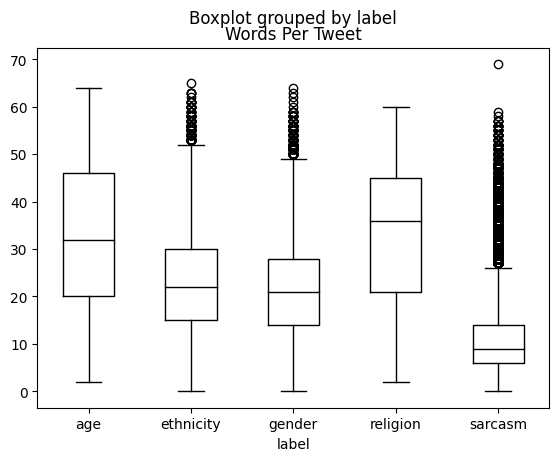

In [29]:
import matplotlib.pyplot as plt
merged_all_df['Words Per Tweet'] = merged_all_df['comment'].str.split().apply(len)

#and plotting to see if length of the comment per label is uniform enough
merged_all_df.boxplot("Words Per Tweet", by="label", grid=False, showfliers=True,
                        color='black',)
#plt.subtitle("aaa")
#plt.xlabel("bbb")

### More on the max length: should we do more truncation of comments?

In [30]:
merged_all_df[merged_all_df['comment'].str.len() < 9]

,label,comment,Words Per Tweet
575,sarcasm,vayne,1
845,sarcasm,fuck YOU,2
1399,sarcasm,greek,1
1417,sarcasm,no,1
1445,sarcasm,is this,2
...,...,...,...
15087,gender,mkr,1
16290,religion,iter 3:,2
39780,ethnicity,,0
41909,ethnicity,coon,1


In [31]:
longer_tweets_df = merged_all_df[merged_all_df['comment'].str.len() > 280]
longer_tweets_df.shape  
print(longer_tweets_df.shape[0], "tweets are still not in regular tweet dimensions...") #34

34 tweets are still not in regular tweet dimensions...


In [32]:
longer_tweets_df.head(4)

,label,comment,Words Per Tweet
8461,gender,"the Today programme on BBC Radio 4 has reached a new low by inviting homophobic and sexist Tory, Toby Young, on the show to defend Theresa May’s new housing tsar, Roger Scruton - a racist far-right figure who also hates gays and thinks date rape is not a crime R4Today pic.twitter.com/LnVFzSqJQq",51
8787,gender,"i like to remind people that 90% of people in detention are male. It's the male anatomy, sorry, girls. They gotta go ""home"".. It's the same with this ""nation"" of sexist idiots who think of women like cattle. It was Jewish gay-boys.. ""Gay is the way"" in a persuasive rape.. pic.twitter.com/bToOWaQoQt",51
9576,gender,"cw // racism, rape, homophobia . . . . . . . . i looked up stuff to prove that magical girl site is sexist if anyone tried to argue with me right NOT ONLY IS IT SEXIST, but it uses racist caricatures and homophobic stereotypes in it by making the only black char gay and a rapist. pic.twitter.com/W0lZe8bcyX",59
10072,gender,">made out with OFW >rape jokes on a murdered female missionary &gt;rape jokes in general &gt;denies hating gays, but also throws it out as an insult &gt;calls leni weak just because she's a woman well tama naman po kayo, matotoo naman siya. totoong gago. :)))) -P.S. not dilawan :)))",49


In [33]:
#dealing with more special characters
merged_all_df['comment'] = merged_all_df['comment'].str.replace('&lt;', '<').str.replace('&gt;', '>')
#deleting links that are on a format we did not filter out yet

merged_all_df['comment'] = merged_all_df['comment'].apply(lambda x: re.sub(".com/", "", x)).apply(lambda x: re.sub("pic.twitter", "", x))

#deleting all numbers
merged_all_df['comment'] = merged_all_df['comment'].apply(lambda x: re.sub(r"\d+", "", x))

In [34]:
longer_tweets_df = merged_all_df[merged_all_df['comment'].str.len() > 280]
longer_tweets_df.shape  
print(longer_tweets_df.shape[0], "tweets are still not in regular tweet dimensions...") #34

8 tweets are still not in regular tweet dimensions...


In [35]:
longer_tweets_df

,label,comment,Words Per Tweet
8787,gender,"i like to remind people that % of people in detention are male. It's the male anatomy, sorry, girls. They gotta go ""home"".. It's the same with this ""nation"" of sexist idiots who think of women like cattle. It was Jewish gay-boys.. ""Gay is the way"" in a persuasive rape.. bToOWaQoQt",51
9576,gender,"cw // racism, rape, homophobia . . . . . . . . i looked up stuff to prove that magical girl site is sexist if anyone tried to argue with me right NOT ONLY IS IT SEXIST, but it uses racist caricatures and homophobic stereotypes in it by making the only black char gay and a rapist. WlZebcyX",59
12284,gender,"you write, ""There is no causal link between men refusing to “call out” a sexist joke and the rape and murder of a stranger."" Wrong. One established risk factor for men's perpetration of rape is male peer support, the belief that peers agree with their behaviour. Speaking up helps ywtfBSMTrr",50
18621,religion,this verse from surah al Ma'idah .. shows you that muslims just don't do what the quran says cuz if they did ISIS would've never existed they just follow what they want and what they desire. If you read the Quran you would understand that muslims aren't terrorists! Educate urself,50
32735,age,woke up with a heavy heart yaz I'm thinking about how I got bullied in high school for dating a dark skinned girl they called her all sorts of name people were evil back then I wish I could show you her pic what a beautiful woman but I need her to give me the go ahead to upload – at Bloubergstrand,62
42863,ethnicity,tHIS IS WHY I SANK THE BITCH ASS KRAKAS...SAME SHIT! FUKA DIDN'T EVEN KNOW HOW TO BUILD NO SHIT LIKE DAT KRAKA!! YOU KNOW YALL DUMB ASS FUCK! SO I DREW IT UP HIS ASS ILLUMINATI CASHED HIS ASS OUT ...I COME WITA CROWED LOOK FLY AS HELL NOO NIGGER..WAA TA FUK! OK! DROWN! HIK!YAS zCEugk,57
45132,ethnicity,the Lord God Almighty knows that I just hate dumb people that always running their mouth and do not know what the fuck they are talking about ! I have my son in here with me that wad born in the Dominican Republic and spent / yearsin Haiti ! That's a damn lie nigger........ umpiwyqcv,56
46027,ethnicity,fuck Fuck georgegambnino georgegambnino Nigeria Nigger world assbole Baltimore's Nigeria Nigger world Assholes Jamaica Nigeria Nigger world Assholes Miami Nigeria Nigger world Assholes NYC Nigeria Nigger world Assholes Gh Nigeria Nigger world Assholes S. Afr No Flags bitch dumb woGBxjjTr,40


In [36]:
#there is still a weird code at the end of those 9 strings. I don't know what it refers to. But it's 9 comments out of 
merged_all_df.shape[0]

517497

## Finally let's make our labels more balanced

<AxesSubplot:ylabel='None'>

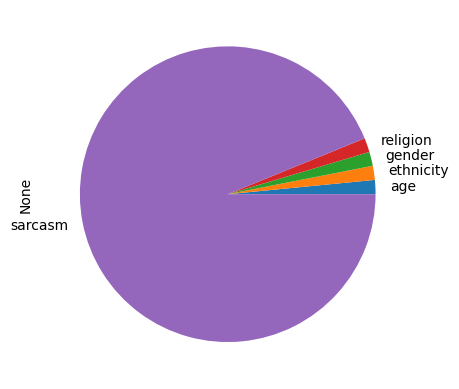

In [37]:
#pie chart per label to see if label quantities are about equal
merged_all_df.groupby('label').size().plot(kind='pie')

#no, that is not balanced at all!

In [38]:
merged_all_df[merged_all_df['label'] == 'sarcasm'] = merged_all_df[merged_all_df['label'] == 'sarcasm'].sample(frac=0.018)

<AxesSubplot:ylabel='None'>

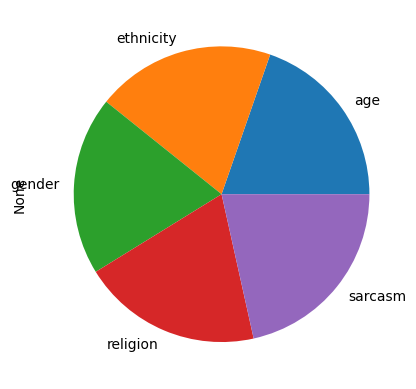

In [39]:
merged_all_df.groupby('label').size().plot(kind='pie')